## Video Games sales EDA analysis (1980-2017)

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:

* Rank - Ranking of overall sales, integer

* Name - The games name, object

* Platform - Platform of the games release (i.e. PC,PS4, etc.), object

* Year - Year of the game's release, float

* Genre - Genre of the game ,object

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape. It is based on BeautifulSoup using Python. There are 16,598 records. 2 records were dropped due to incomplete information.

![VG](https://storage.needpix.com/rsynced_images/gamepad-1837422_1280.png)

---

## Import modules 

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [38]:
warnings.filterwarnings('ignore')

## Configure seaborn parameters

In [39]:
sns.set(context='notebook', font='monospace')
sns.despine()

%matplotlib inline

## Read the data 

In [40]:
raw_data = pd.read_csv(r'Datasets\vgsales.csv')

In [41]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Delete null values 

In [42]:
print(raw_data.isnull().sum())
data = raw_data.dropna()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [43]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Top 10 of the world's best-selling video games

In [44]:
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Subsetting the data 

In [45]:
print('Games :', len(data))
print('Publishers :', len(data['Publisher'].unique()))
print('Platforms :', len(data['Platform'].unique()))
print('Genres :', len(data['Genre'].unique()))
print('The lowest year value :', data['Year'].min())
print('The max year value is :', data['Year'].max())

df_group_platform = data.groupby(['Platform']).sum()
df_group_years = data.groupby(['Year']).sum()
df_group_genre = data.groupby(['Genre']).sum()
df_group_publisher = data.groupby(['Publisher']).sum()

df_top10 = data.head(10)
df_top100 = data.head(100)

Games : 16291
Publishers : 576
Platforms : 31
Genres : 12
The lowest year value : 1980.0
The max year value is : 2020.0


## General overview

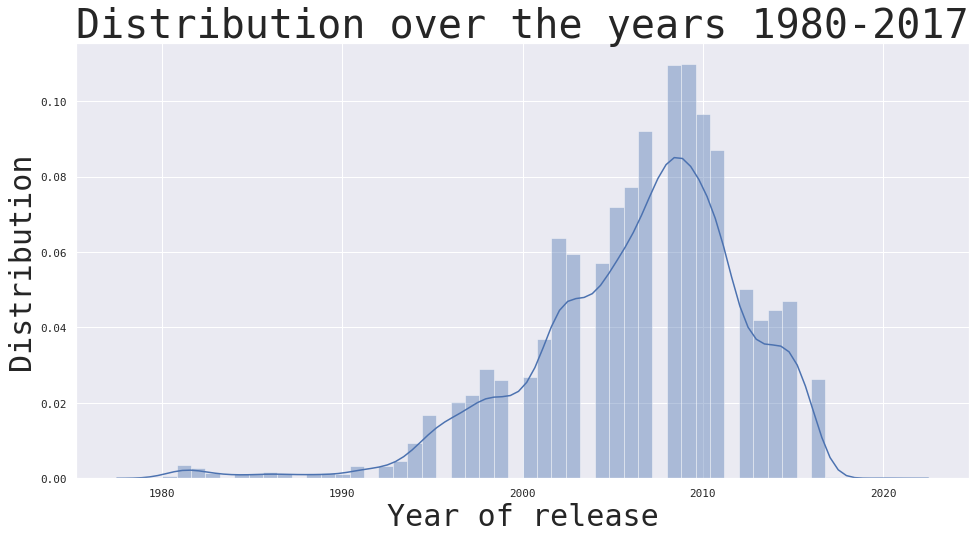

In [101]:
plt.figure(figsize=(16, 8))
data_displot = sns.distplot(data['Year'], bins=50)
data_displot.set_xlabel(xlabel='Year of release', fontsize=30)
data_displot.set_ylabel(ylabel='Distribution', fontsize=30)
data_displot.set_title(label='Distribution over the years 1980-2017', fontsize=40)
plt.show()

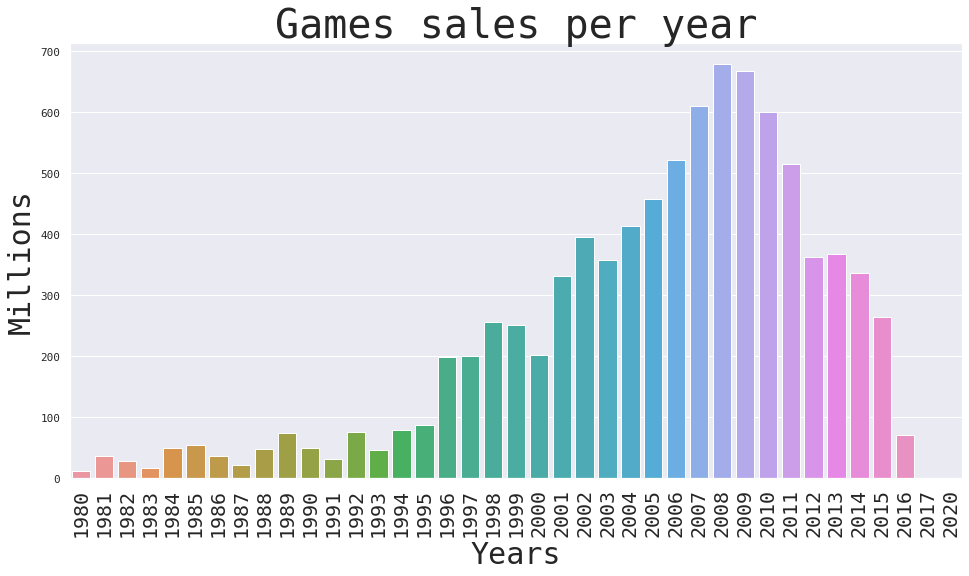

In [100]:
plt.figure(figsize=(16, 8))
data_game_sales = sns.barplot(y= df_group_years['Global_Sales'], x= df_group_years['Global_Sales'].index.astype(int))
data_game_sales.set_xlabel(xlabel='Years', fontsize=30)
data_game_sales.set_xticklabels(labels= df_group_years['Global_Sales'].index.astype(int), fontsize=20, rotation=90)
data_game_sales.set_ylabel(ylabel='Millions', fontsize=30)
data_game_sales.set_title(label='Games sales per year', fontsize=40)
plt.show()

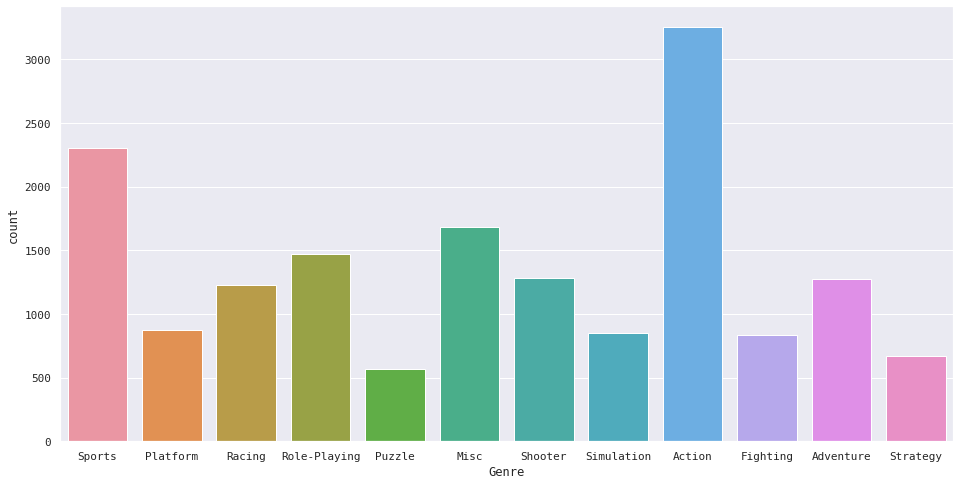

In [102]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Genre', data=data)

## Top 100 best selling video games 

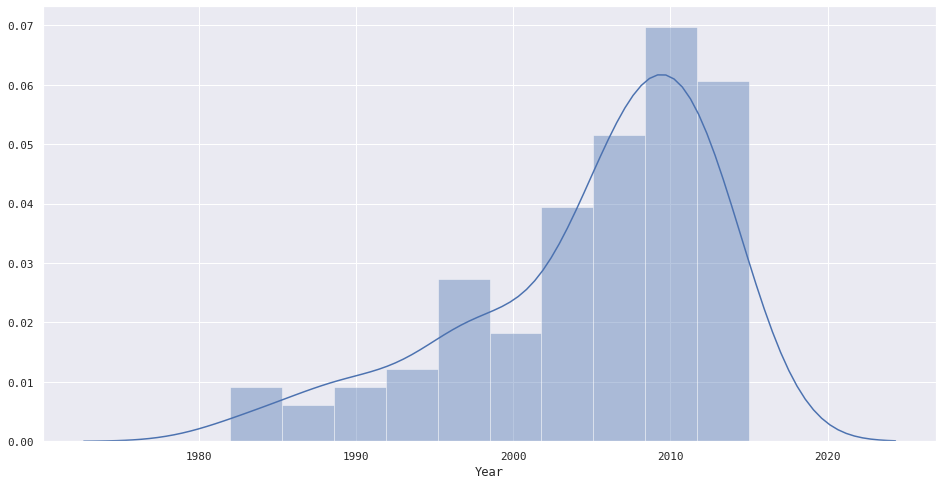

In [103]:
plt.figure(figsize=(16, 8))
sns.distplot(df_top100['Year'], bins=10)

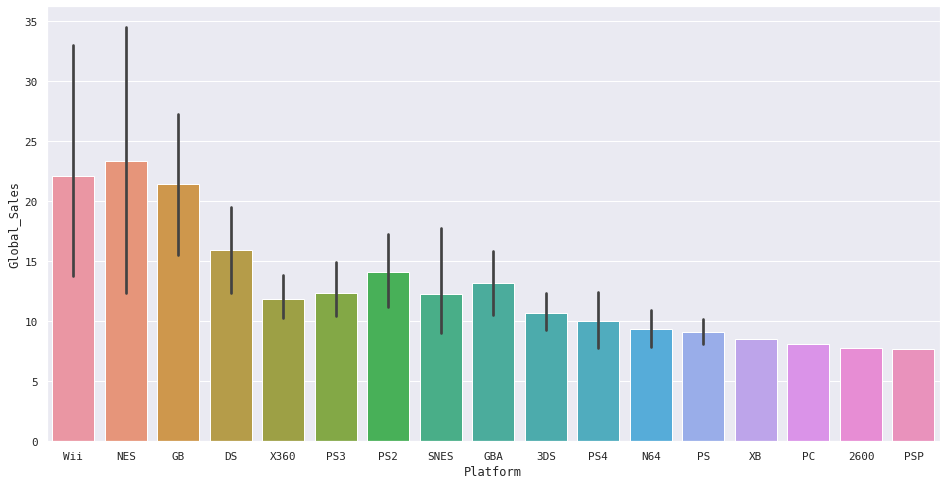

In [104]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Platform', y='Global_Sales', data=df_top100) 

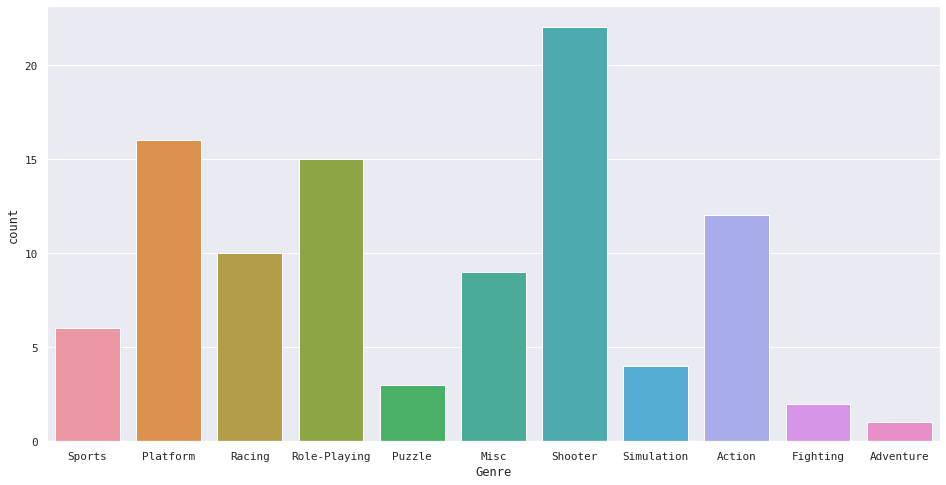

In [105]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Genre', data=df_top100)

## Top 10 best selling video games

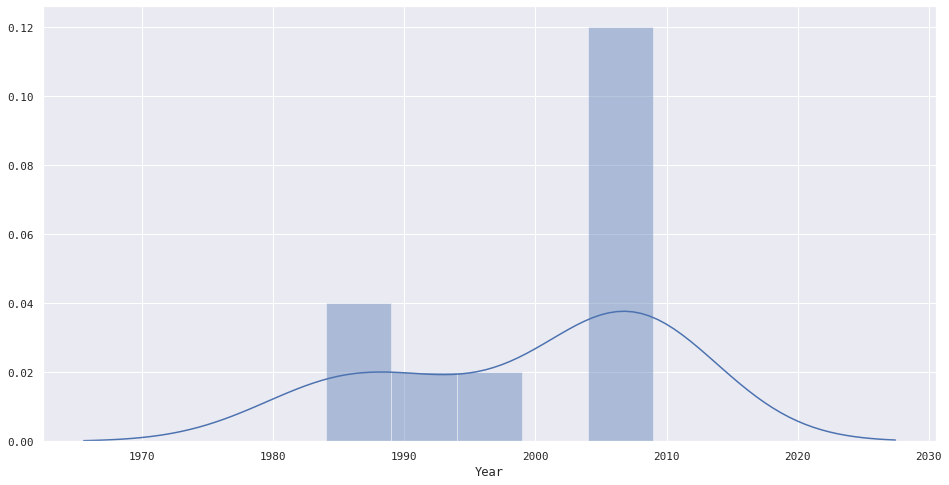

In [106]:
plt.figure(figsize=(16, 8))
sns.distplot(df_top10['Year'], bins=5)

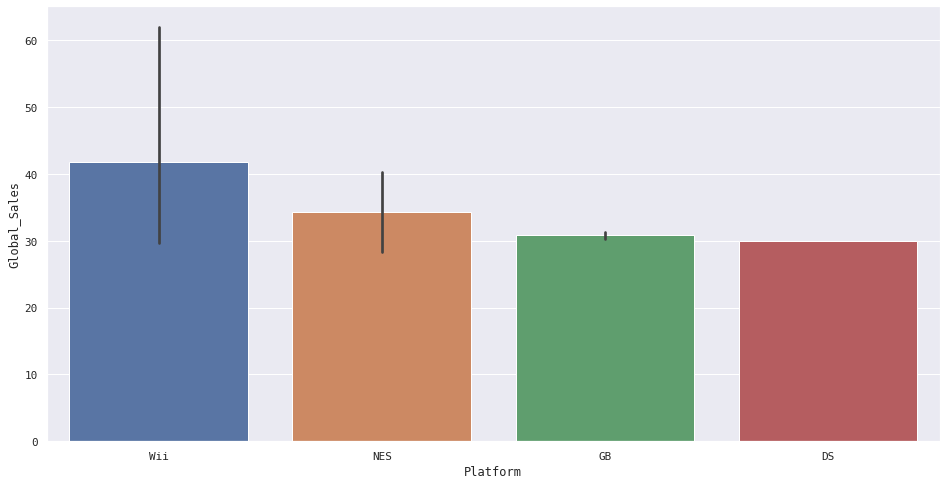

In [107]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Platform', y='Global_Sales', data=df_top10)

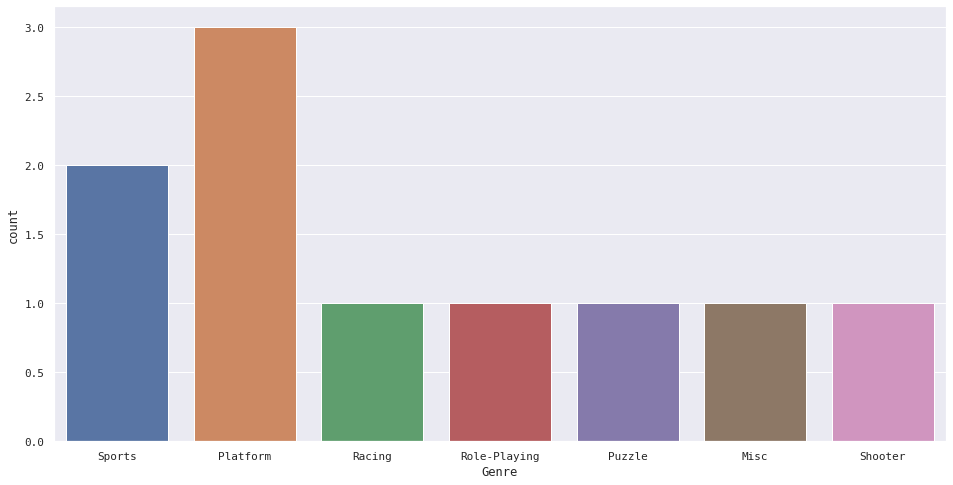

In [108]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Genre', data=df_top10)